**Task 1:** Find a data set which is suitable for a regression task (you can use one of the data sets which you used in Homework I and there is no limit on the number of features or type of the features). Then, apply [DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) and  [RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) to this data set to find the best performing model with respect to **mean squared error** metric. Report the feature importance of best performing algorithm and comment on it.


#### Instructions to follow:

- Include all your codes here. Be sure that your code is CLEAN, READABLE, and REPRODUCIBLE.
- Put your data set into a **datasets** folder.
- Put your images (if available) into an **images** folder.
- Please return a NICE and CLEAR homework. Otherwise, it will not be graded.
- Please write YOUR OWN code. **DO NOT copy** my codes or someone else's codes.

### Libraries

In [502]:
import sklearn
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
#When we fit our dataset with a process and then transform it, 
#this code should be executable in order not to lose the column numbers in the dataframe,:
from sklearn import set_config
set_config(transform_output="pandas") 

# Data Decription

## California House Price

I used a different dataset from the first assignment for this assignment, because unfortunately I realized that the datasets I used in the first assignment are not suitable for linear regression analysis. I also wanted to use the House Price dataset, which is actually one of the known datasets, I chose this dataset because it contains categorical and numeric variables, even though it is a known dataset. At the same time, this dataset has been used many times in competitions, so I wanted to work with this dataset.

However, I used the California dataset instead of the more well-known Boston dataset so that it would not be too familiar.

Our aim is to build a house price model to estimate the median house values in California using the dataset.

Descriptions of features in the dataset:
- longitude: Longitude value for the block in California, USA
- latitude: Latitude value for the block in California, USA
- housing_median_age: Median age of the house in the block
- total_rooms: Count of the total number of rooms (excluding bedrooms) in all houses in the block
- total_bedrooms: Count of the total number of bedrooms in all houses in the block
- population: Count of the total number of population in the block
- households: Count of the total number of households in the block
- median_income: Median of the total household income of all the houses in the block
- ocean_proximity: Type of the landscape of the block
- median_house_value: Median of the household prices of all the houses in the block. This is our target features.

Importing dataset:

In [503]:
df=pd.read_csv("../datasets/housing.csv") 

Let's take a closer look at the dataset

In [504]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [505]:
df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND,84700
20639,-121.24,39.37,16,2785,616.0,1387,530,2.3886,INLAND,89400


In [506]:
df.shape #return the dimension

(20640, 10)

In [507]:
df.columns #return column names:

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

In [508]:
df.info()
#return some infos about dataset like non-null count and dtype of columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


That's enough for now. It seems that there are 20640 house reviews in our dataset. All of the properties of these houses are numerical except for one, and the total bedrooms property has null values. Before we examine it more closely, let's divide the data into train and test and observe all our observations on the train dataset.

In [509]:
X = df.drop(columns=df.columns[-1], axis=1) #I take all feature except house value feature for use in the model 
y = df[df.columns[-1]]

In [510]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1454)
#While seperating X to the train and test data set, I took the ratio as 0.2.
#Since I gave a random state, the analysis will not change in repeated studies.

In [511]:
for i in X_train.columns:
    print(i, " ", X_train[i].value_counts().info)

longitude   <bound method Series.info of -118.30    134
-118.31    131
-118.35    122
-118.27    119
-118.28    116
          ... 
-123.18      1
-115.93      1
-115.85      1
-116.11      1
-115.69      1
Name: longitude, Length: 819, dtype: int64>
latitude   <bound method Series.info of 34.05    193
34.06    191
34.07    190
34.08    187
34.02    177
        ... 
35.85      1
40.03      1
40.64      1
40.91      1
40.25      1
Name: latitude, Length: 842, dtype: int64>
housing_median_age   <bound method Series.info of 52    1012
36     684
35     655
16     611
34     563
17     554
33     496
26     495
25     456
18     455
32     437
37     420
19     418
15     408
24     387
27     384
29     381
31     369
20     369
28     369
30     369
21     361
23     349
14     334
38     312
22     312
39     299
42     292
43     290
44     282
40     255
13     244
41     240
45     238
10     224
11     205
5      201
46     192
12     191
8      170
47     168
9      154
4      152
4

In [512]:
for i in range(len( X_train.columns)):
    print( X_train.columns[i].upper()+":")
    print("Number of unique value: ",len( X_train[ X_train.columns[i]].unique()))


LONGITUDE:
Number of unique value:  819
LATITUDE:
Number of unique value:  842
HOUSING_MEDIAN_AGE:
Number of unique value:  52
TOTAL_ROOMS:
Number of unique value:  5488
TOTAL_BEDROOMS:
Number of unique value:  1819
POPULATION:
Number of unique value:  3623
HOUSEHOLDS:
Number of unique value:  1707
MEDIAN_INCOME:
Number of unique value:  10958
OCEAN_PROXIMITY:
Number of unique value:  5


All 9 of the 9 numeric features consist of continuous values. The ocean_proximity property is a categorical variable.

## Decision Tree Regressor Implementation

- Implement your decision tree regressor here.
- This part may involve tuning of hyper parameters of decision tree regressor with respect to **mean squared error** metric.
- Visualize the best performing decision tree here.
- Comment on the feature importance here.

Decision Tree Classifier is implemented in DecisionTreeRegression class of scikit-learn. The main parameters of the DecisionTreeClassifier function are:

**criterion**: The function to measure the quality of a split: “squared_error”, “friedman_mse”, “absolute_error”, or “poisson”. Default=”squared_error”, We use "squared_error" which provide mse metric. \
**max_depth**:(default=None) The maximum depth of the tree. \
**min_samples_split** (default=2): The minimum number of samples required to split an internal node. \
**min_samples_leaf** (default=1): The minimum number of samples required to be at a leaf node. This may have the effect of smoothing the model, especially in regression. \
**max_features** {“auto”, “sqrt”, “log2”}, default=None : The number of features to consider when looking for the best split. **max_leaf_nodes** int, default=None: Grow a tree with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. \
**min_impurity_decrease** float, default=0.0: A node will be split if this split induces a decrease of the impurity greater than or equal to this value.

Before making Decision Tree Regressor, we will first need to encode our categorical data.

Ocean_proximity özelliğinin kategorik varlıkları, bu özellik etiketlememiz, bu nedenle ilk olarak bu özelliği ayrı bir şekilde konumlandırıyor ve OneHotEncoder uygulayıp geri veri kümelerini birleştiriyoruz

In [514]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
# Create an instance of OneHotEncoder with 'drop' parameter set to 'first' for destroy first parameter
drop_enc = OneHotEncoder(drop='first', sparse=False)

# Select the column to be encoded
selected_column = 'ocean_proximity'

# Select the 'ocean_proximity' column from X_train and X_test
X_selected = X_train[[selected_column]]
X_selected_test = X_test[[selected_column]]

# Perform one-hot encoding on the selected column
X_ocean_proximity = drop_enc.fit_transform(X_selected)
X_ocean_test = drop_enc.transform(X_selected_test)

# Create DataFrames for the encoded features
X_ocean_proximity_train = pd.DataFrame(X_ocean_proximity, columns=drop_enc.get_feature_names_out([selected_column]))
X_ocean_proximity_test = pd.DataFrame(X_ocean_test, columns=drop_enc.get_feature_names_out([selected_column]))


X_train_encoded = pd.concat([X_train, X_ocean_proximity], axis=1) 
X_test_encoded = pd.concat([X_test, X_ocean_test], axis=1)

# Drop the original 'ocean_proximity' column from the encoded DataFrames
X_train_encoded.drop("ocean_proximity", axis=1, inplace=True)
X_test_encoded.drop("ocean_proximity", axis=1, inplace=True)

# Perform imputation on the encoded DataFrames
X_train_encoded= imputer.fit_transform(X_train_encoded)
X_test_encoded =imputer.transform(X_test_encoded)

print(X_train_encoded.shape, X_test_encoded.shape)


(16512, 12) (4128, 12)


Now let's create our decision tree model and try it on the new X_train_encoded:

In [515]:
from sklearn.tree import DecisionTreeRegressor

d_tree = DecisionTreeRegressor(criterion="squared_error", max_depth=4, random_state=1454)
d_tree.fit(X_train_encoded, y_train)

print(d_tree)

DecisionTreeRegressor(max_depth=4, random_state=1454)


Let's predict the y value on the train and test datasets through the model we created.

In [516]:
y_tr_predict=d_tree.predict(X_train_encoded)
y_predict=d_tree.predict(X_test_encoded)

Regressor analysis gives default r2 as score, since MSE is requested from us in the assignment, I calculated both.

In [517]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score
print("MSE train: ",mean_squared_error(y_train,y_tr_predict) , "\nMSE test: ",mean_squared_error(y_test,y_predict))
print("r2 train: ",r2_score(y_train,y_tr_predict) ,"\nr2 test: ",r2_score(y_test,y_predict))


MSE train:  5201785885.045276 
MSE test:  5555622743.147721
r2 train:  0.6098485136645474 
r2 test:  0.5805936776379379


At the same time, I also had the CV recalculated the mse score here so that the result would be more consistent.

In [529]:
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=5, shuffle=True, random_state=1454)
mse_scores = cross_val_score(d_tree, X_train_encoded, y_train, cv=kfold, scoring='neg_mean_squared_error')
mse_scores = -mse_scores
print("Score of MSE on train datas:", mse_scores.min())

Score of MSE on train datas: 5285456279.665633


If we look at the scores above, we can see that the train and the test's  results are not that bad. Let's play on the parameters to increase the score We will use randomSearch for this. But first let's take a look at the parameters of our current model.

In [474]:
d_tree.get_n_leaves()

16

In [475]:
d_tree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 1454,
 'splitter': 'best'}

Now let's draw our decision tree. Since we want to see the impurity value in the drawings, let's mark this parameter as True.

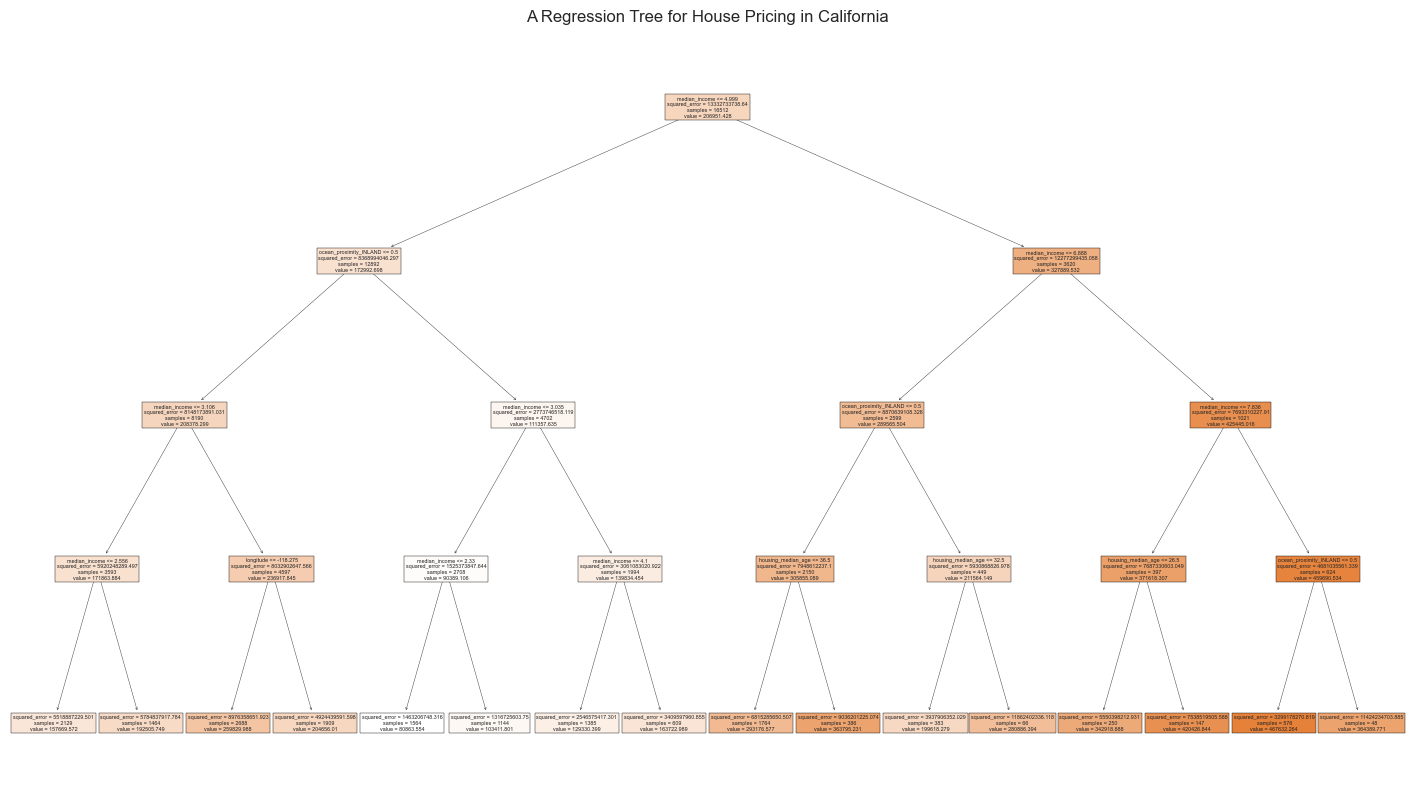

In [522]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [18, 10]

from sklearn.tree import plot_tree

fig, ax = plt.subplots()

tree_plot = plot_tree(d_tree, feature_names=X_train_encoded.columns, impurity=True, ax=ax, filled=True)
plt.title("A Regression Tree for House Pricing in California")
plt.show();

In [477]:
print("Train Accuracy: %.2f %%" % (d_tree.score(X_train_encoded, y_train)*100)) #defatult r2
print("Test Accuracy: %.2f %%" % (d_tree.score(X_test_encoded, y_test)*100))

Train Accuracy: 60.98 %


## Results of Different Parameters
Some parameters of the Decision Tree model can be divided into two groups as max value and min value (max_depth, max_leaf_nodes, min_samples_split, min_samples_leaf) In general, it will give us the best result to find a middle way by keeping the maximum values as small as possible and minimum values as large as possible. This way we prevent overfitting.

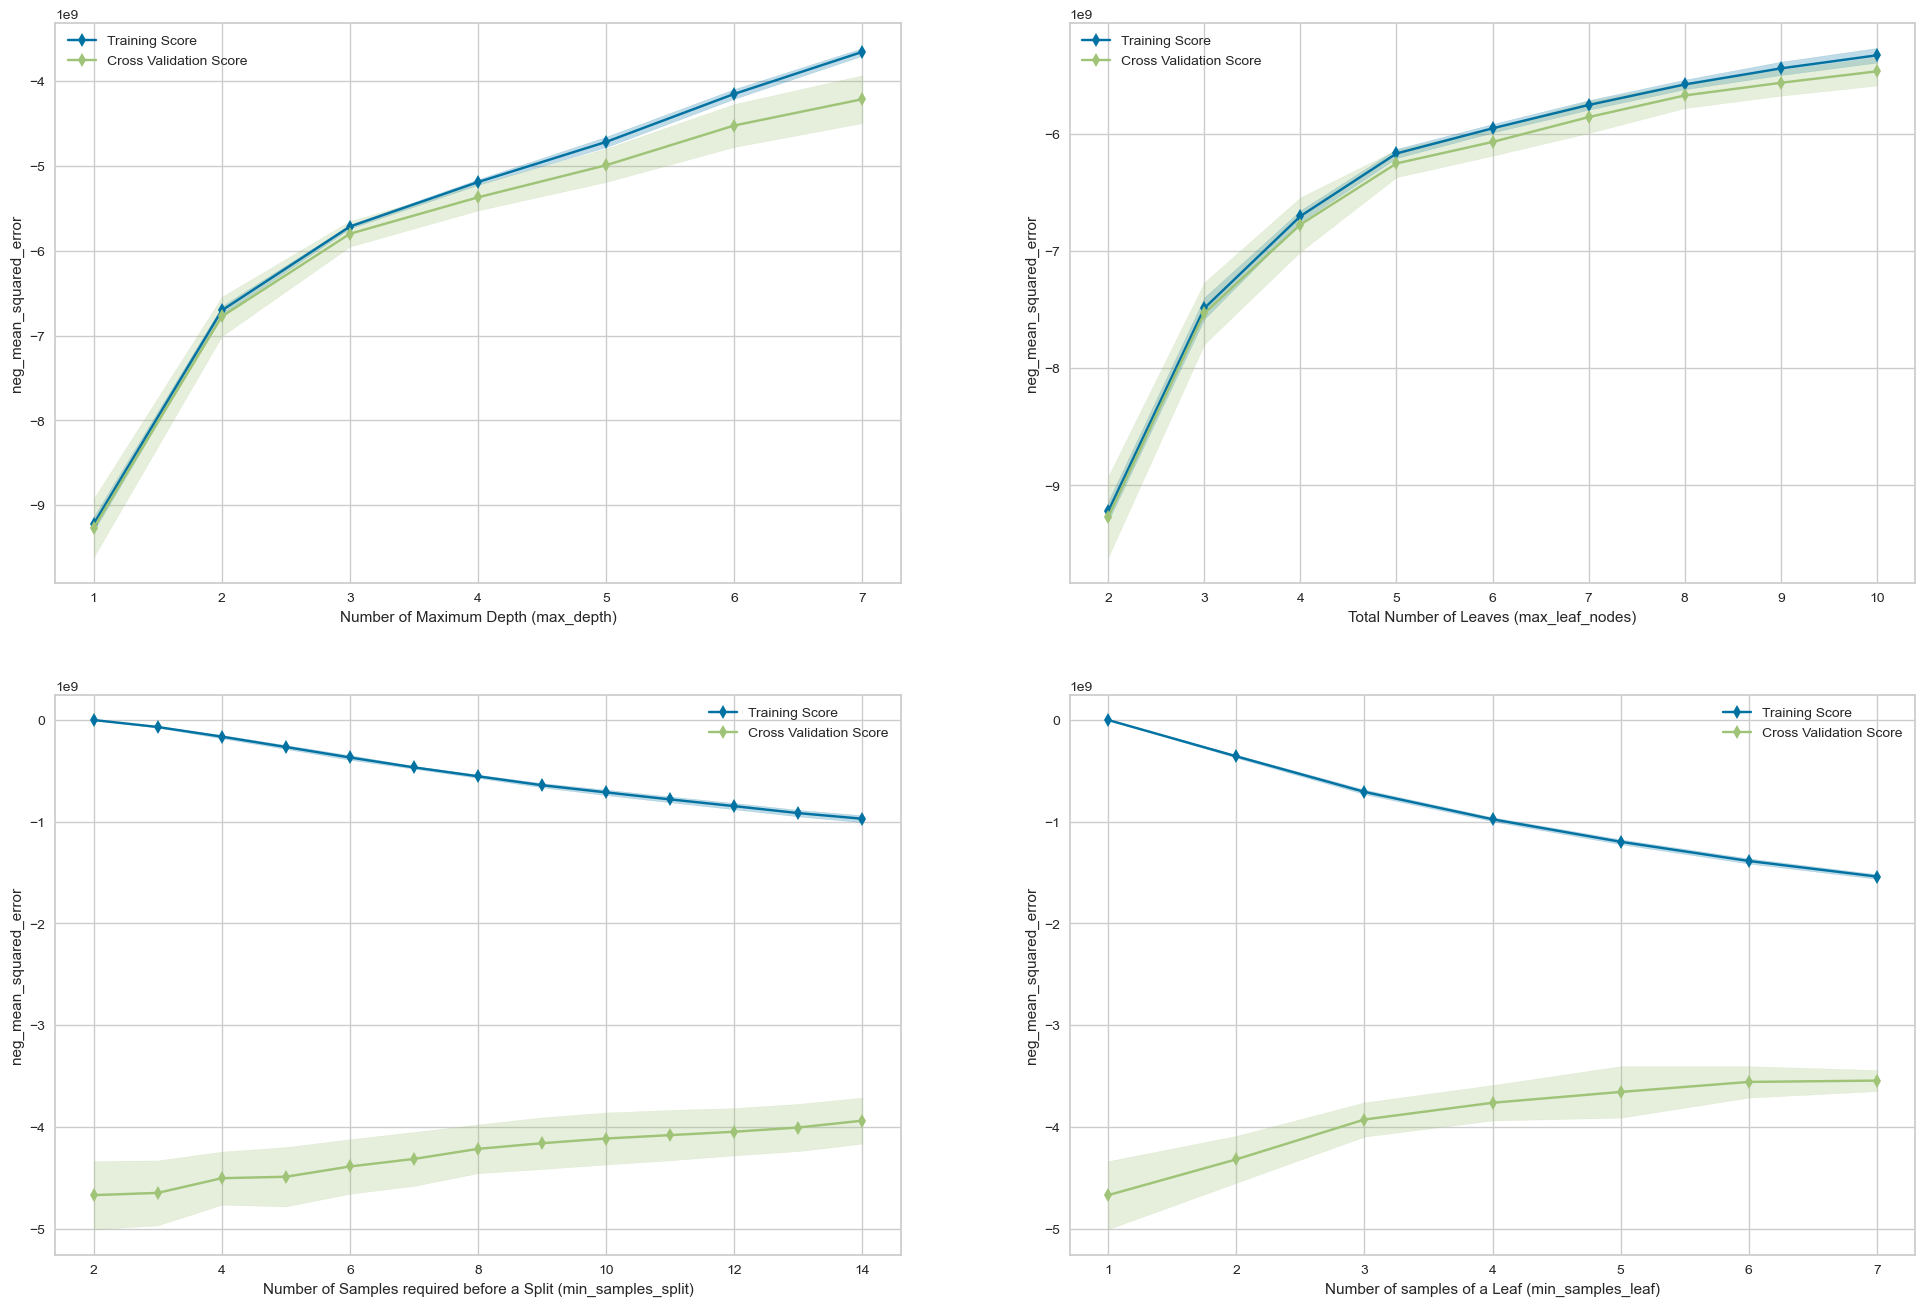

In [523]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [24, 16]
from sklearn.model_selection import KFold
from yellowbrick.model_selection import ValidationCurve
tree = DecisionTreeRegressor(criterion="squared_error", random_state=1454)
cv_index = KFold(n_splits=3, shuffle=True, random_state=1454)    
param_names = ["max_depth", "max_leaf_nodes", "min_samples_split", "min_samples_leaf"] 
param_ranges = [list(range(1, 8)), list(range(2, 11)),list(range(2, 15)), list(range(1, 8))]   
title=["Number of Maximum Depth (max_depth)", 
       "Total Number of Leaves (max_leaf_nodes)", 
       "Number of Samples required before a Split (min_samples_split)",
       "Number of samples of a Leaf (min_samples_leaf)"]
fig, axis = plt.subplots(2,2)
for i, ax in enumerate(axis.reshape(-1), 0):
    
    visualizer = ValidationCurve(estimator = tree, 
                                 param_name = param_names[i],  
                                 param_range = param_ranges[i], 
                                 cv = kcv_index, 
                                 scoring = 'neg_mean_squared_error', 
                                 ax = ax)

    # Visualize
    visualizer.fit(X_train_encoded, y_train)
    visualizer.ax.set_ylabel('neg_mean_squared_error')
    visualizer.ax.set_xlabel(title[i])
    visualizer.ax.legend().set_visible(True);


When we look at the graphs above, when we look at the max_depth, max_leaf_nodes parameters, it is observed that the increase in the value decreases the error, on the contrary, the error is less in case the value is low in the min parameters. But what we need to pay attention to here is that these graphs are created by taking into account the Train data, so getting the best value for all parameters causes over-fitting, while we need to get the optimum value.

I wrote this part above by looking at and understanding your code, I thought it would be important for my interpretation and wanted to add it to the assignment.

## Pre-Pruning using RandomSearchCV

We aim to find the parameters that give the best NMSE using RandomSearchCv. Unlike GridSearch, in RandomSearch we randomly try for parameters and try to find the best result, otherwise the processing load would be too long.

In [531]:
#multiple hyper-parameter tuning with RandomizedSearchCV
from sklearn.model_selection import KFold, RandomizedSearchCV

tree = DecisionTreeRegressor(random_state=1454)

#defining parameter range
param_grid = {'max_depth': list(range(1, 9)),
              'max_leaf_nodes': [2, 3, 4, 5, 6, 7,None],
              'min_samples_split': list(range(2,8)),
               'min_samples_leaf': list(range(4, 8)),
              }

#The folds are made by preserving the percentage of samples for each class.
cv_index = KFold(n_splits=5, shuffle=True, random_state=1454) 

rd_search = RandomizedSearchCV(estimator = tree, 
                               param_distributions = param_grid,  #only this argument name is different
                               scoring='neg_mean_squared_error', 
                               cv = cv_index,
                               random_state=1454) #randomized

In [532]:
rd_search.fit(X_train_encoded, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1454, shuffle=True),
                   estimator=DecisionTreeRegressor(random_state=1454),
                   param_distributions={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                                        'max_leaf_nodes': [2, 3, 4, 5, 6, 7,
                                                           None],
                                        'min_samples_leaf': [4, 5, 6, 7],
                                        'min_samples_split': [2, 3, 4, 5, 6,
                                                              7]},
                   random_state=1454, scoring='neg_mean_squared_error')

In [533]:
rd_search.best_estimator_

DecisionTreeRegressor(max_depth=5, min_samples_leaf=5, min_samples_split=4,
                      random_state=1454)

In [543]:
print("MSE of train_encoded data: %.2f " % (rd_search.score(X_train_encoded, y_train)*-1))

MSE of train_encoded data: 4790788133.78 


In [544]:
print("MSE of test_encoded data: %.2f " % (rd_search.score(X_test_encoded, y_test)*-1))

MSE of test_encoded data: 5264564951.71 


As you can see, we improved the model by reducing the error of our train and test data by using randomSearch Cv. However, unfortunately, there was more between the train result and the test result compared to the first situation. We can interpret this situation by increasing max_depth according to the first value.

In [485]:
print(rd_search.best_estimator_.feature_names_in_)
print(rd_search.best_estimator_.feature_importances_)

['longitude' 'latitude' 'housing_median_age' 'total_rooms'
 'total_bedrooms' 'population' 'households' 'median_income'
 'ocean_proximity_INLAND' 'ocean_proximity_ISLAND'
 'ocean_proximity_NEAR BAY' 'ocean_proximity_NEAR OCEAN']
[0.03415456 0.01795424 0.0190921  0.         0.00165589 0.
 0.00084834 0.69858818 0.22770669 0.         0.         0.        ]


When we create a model with the Decision Tree algorithm, not every feature has the same effect on the model. Now let's visualize this by examining the feature_importance metric.

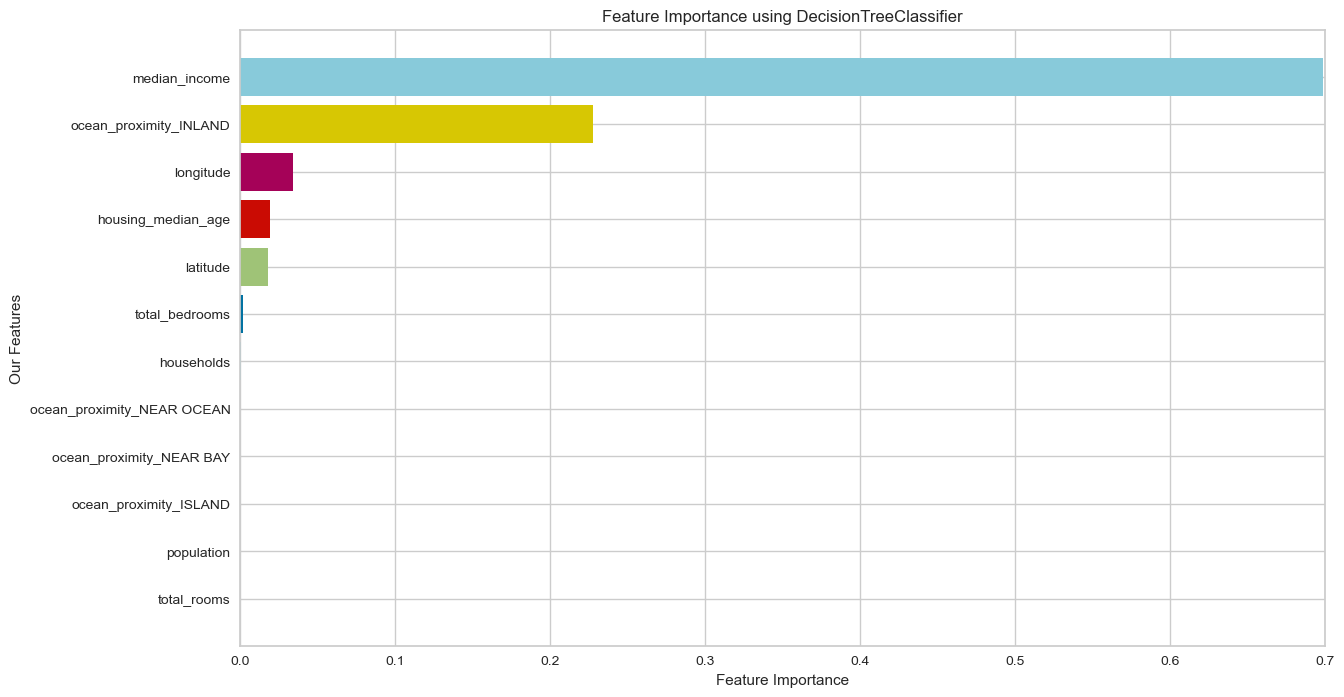

In [546]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [14, 8]

from yellowbrick.model_selection import FeatureImportances

# Create subplots for the figure and axes
fig, ax = plt.subplots()
# Instantiate the FeatureImportances visualizer with the best estimator from the random search (rd_search)
viz = FeatureImportances(rd_search.best_estimator_, relative=False, ax = ax) 
# Fit the visualizer on the encoded training data (X_train_encoded) and target variable (y_train)
viz.fit(X_train_encoded, y_train)
# Set the x-axis limits for better visualization
viz.ax.set_xlim((0,0.7))

viz.ax.set_title("Feature Importance using DecisionTreeClassifier")
viz.ax.set_xlabel("Feature Importance")
viz.ax.set_ylabel("Our Features")
plt.show();

## Random Forest Tree Regressor Implementation

- Implement your random forest tree regressor here.
- This part may involve tuning of hyper parameters of random forest regressor.
- Visualize one of the trees in the best performing random forest regressor.
- Comment on the feature importance here.

Implement your random forest tree regressor here:

In [558]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=4,  max_features='sqrt', random_state=1454)  
rf.fit(X_train_encoded, y_train)
print(rf)

RandomForestRegressor(max_depth=4, max_features='sqrt', random_state=1454)


In [559]:
len(rf.estimators_)

100

In [560]:
X_train_encoded.shape

(16512, 12)

Visualize one of the trees in the best performing random forest regressor. I wanted to draw the 26th tree

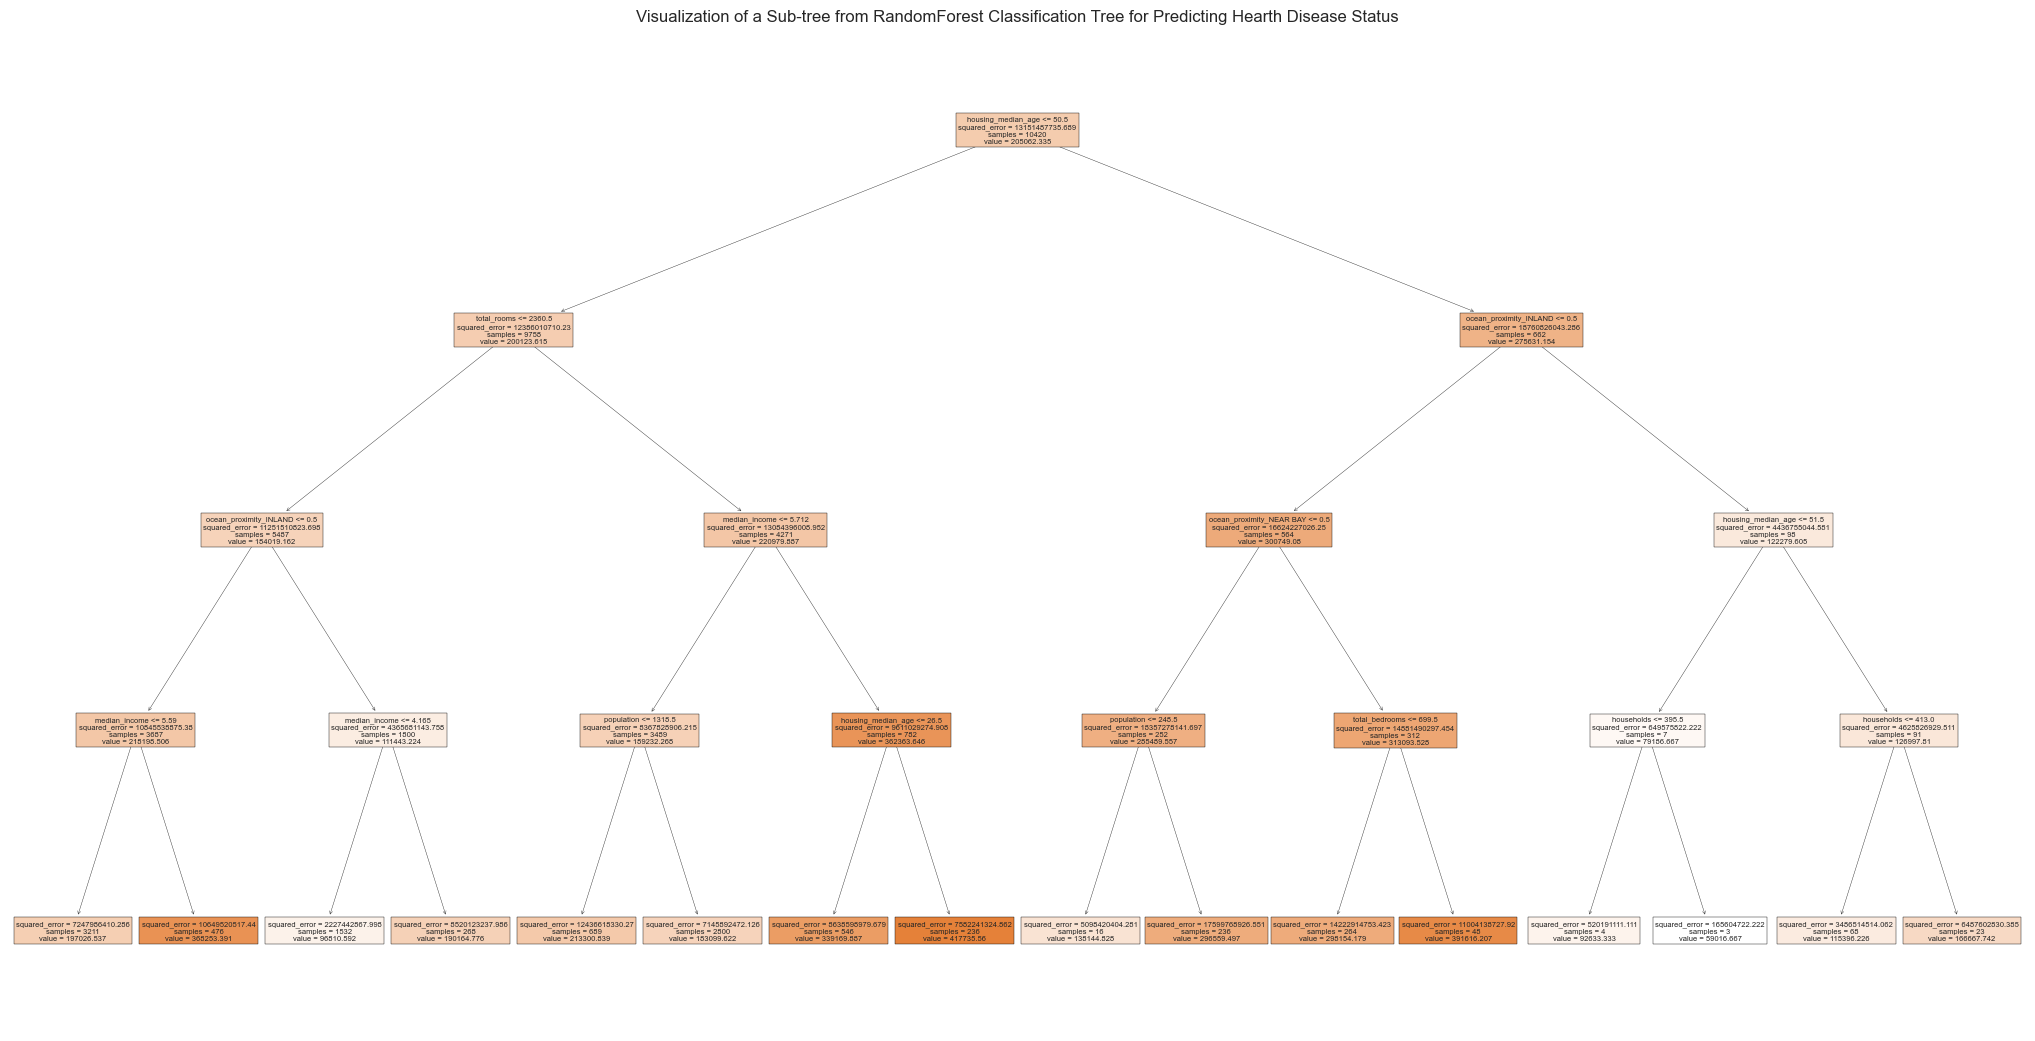

In [563]:
#visualize the sub-tree
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [26, 13]

from sklearn.tree import plot_tree

fig, ax = plt.subplots()

tree_plot = plot_tree(rf.estimators_[35], feature_names=X_train_encoded.columns, impurity=True, ax=ax, filled=True)
plt.title("Visualization of a Sub-tree from RandomForest Classification Tree for Predicting Hearth Disease Status")
plt.show();


Regression gives the r2 score as the default score. I calculated the MSE myself.

In [565]:
y_tr_predict=rf.predict(X_train_encoded)
y_predict=rf.predict(X_test_encoded)

In [566]:
print("MSE train: ",mean_squared_error(y_train,y_tr_predict) , "\nMSE test: ",mean_squared_error(y_test,y_predict))


MSE train:  5652469628.255302 
MSE test:  5845704686.351082


In [567]:
print("Train Accuracy: %.2f %%" % (rf.score(X_train_encoded, y_train)*100))
print("Test Accuracy: %.2f %%" % (rf.score(X_test_encoded, y_test)*100))

Train Accuracy: 57.60 %
Test Accuracy: 55.87 %


This part involve tuning of hyper parameters of random forest regressor: 

In [552]:
#multiple hyper-parameter tuning with RandomizedSearchCV
from sklearn.model_selection import KFold, RandomizedSearchCV


from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=1454) 

#defining parameter range
param_grid = {'max_depth': list(range(1, 9)),
              'max_leaf_nodes': [2, 3, 4, 5, 6, 7,None],
              'min_samples_split': list(range(2,8)),
               'min_samples_leaf': list(range(4, 8)),
              }

#The folds are made by preserving the percentage of samples for each class.
cv_index = KFold(n_splits=5, shuffle=True, random_state=1454) 

rd_search = RandomizedSearchCV(estimator = rf, 
                               param_distributions = param_grid,  #only this argument name is different
                               scoring='neg_mean_squared_error', 
                               cv = cv_index,
                               random_state=1773) #randomized

In [553]:
rd_search.fit(X_train_encoded, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1454, shuffle=True),
                   estimator=RandomForestRegressor(random_state=1454),
                   param_distributions={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                                        'max_leaf_nodes': [2, 3, 4, 5, 6, 7,
                                                           None],
                                        'min_samples_leaf': [4, 5, 6, 7],
                                        'min_samples_split': [2, 3, 4, 5, 6,
                                                              7]},
                   random_state=1773, scoring='neg_mean_squared_error')

In [554]:
rd_search.best_estimator_

RandomForestRegressor(max_depth=3, max_leaf_nodes=7, min_samples_leaf=6,
                      random_state=1454)

In [556]:
print("MSE of train_encoded data: %.2f " % (rd_search.score(X_train_encoded, y_train)*-1))
print("MSE of test_encoded data: %.2f " % (rd_search.score(X_test_encoded, y_test)*-1))

MSE of train_encoded data: 5568592619.22 
MSE of test_encoded data: 5810384894.67 


Comment on the feature importance here. As you can see, RandomForest model cares more about features than DecisionTree.

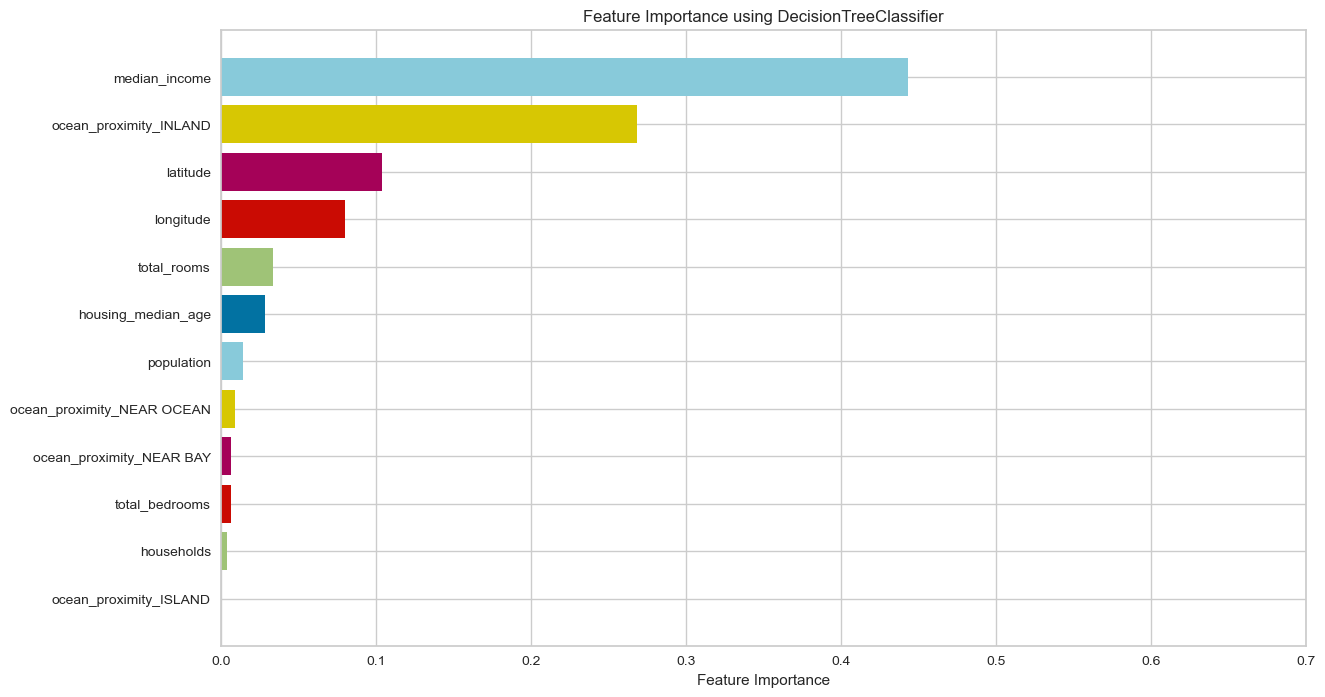

In [570]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [14, 8]
from yellowbrick.model_selection import FeatureImportances
fig, ax = plt.subplots()

# Instantiate the FeatureImportances visualizer with the random forest model (rf)
viz = FeatureImportances(rf, relative=False, ax = ax) #change plot type

# Fit the visualizer on the encoded training data (X_train_encoded) and target variable (y_train)
viz.fit(X_train_encoded, y_train)

# Set the x-axis limits for better visualization
viz.ax.set_xlim((0,0.7))

# Set the title and x-axis label for the plot
viz.ax.set_title("Feature Importance using DecisionTreeClassifier")
viz.ax.set_xlabel("Feature Importance")
plt.show();

## Conclusion

- Pick the best performing model.
- Provide detailed explanation on why you picked this model as the final model here and talk about the feature importance.

Pick the best performing model: 
![Açıklama](images/model.png)

Now that we've come to the end, let's take a look at what we did from the beginning. We trained 2 models, DecisionTree and RandomForest, and also adjusted the hyperparameters of these models. We tuned the hyperparameters. In this case, as expected, the models we obtained after tuning the tune turned out to be much better than the first default values. Among the two models, I would choose RandomForest. The two models are actually separated from each other in many parts, not only in the feature importance part. To take a closer look, the Decision tree creates a tree structure that makes sequential decisions using a dataset, while Random Forest uses multiple decision trees. Each tree is trained independently using a random subset of the training data and combined its results to make a prediction. This allows each tree to be trained on a different subset of data points. Therefore, the decision Tree tends to be more adapted to the dataset. On the other hand, the random forest is much more resistant because it is a combination of many trees. The use of different trees allows better generalization. As we have already seen above, Random Forest uses different trees, while each more feature works with more features in the decision tree, much less features are active in the model. However, I have to admit that RandomForest is actually very slow for all its good features. I had to wait a bit, especially while tuning the hyperparameter. When we look at the score, although the Decision Tree result is better for this model, I will prefer RandomForest when I do not have time problems due to the features I have mentioned in terms of consistency.